# 주문지역 인구특성 시각화

1. 전국 데이터
2. 서울특별시 데이터
3. 경기도 데이터

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
raw_pop = pd.read_csv('KGUPOPLTNINFO.csv', header=None)
pop = raw_pop.copy()
pop.head(5)

,0,1,2,3,4,5,6,7
0,201801,11110,서울특별시,종로구,0-4세,4070,2054,2016
1,201802,11110,서울특별시,종로구,0-4세,4049,2049,2000
2,201803,11110,서울특별시,종로구,0-4세,4022,2036,1986
3,201804,11110,서울특별시,종로구,0-4세,4008,2025,1983
4,201805,11110,서울특별시,종로구,0-4세,4007,2017,1990


In [3]:
## 컬럼명 설정

In [4]:
pop.columns = ["date", "code", "sido","gu","age","totalpop","malepop","femalepop"]

In [5]:
pop.head(5)

,date,code,sido,gu,age,totalpop,malepop,femalepop
0,201801,11110,서울특별시,종로구,0-4세,4070,2054,2016
1,201802,11110,서울특별시,종로구,0-4세,4049,2049,2000
2,201803,11110,서울특별시,종로구,0-4세,4022,2036,1986
3,201804,11110,서울특별시,종로구,0-4세,4008,2025,1983
4,201805,11110,서울특별시,종로구,0-4세,4007,2017,1990


In [6]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157374 entries, 0 to 157373
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   date       157374 non-null  int64 
 1   code       157374 non-null  int64 
 2   sido       157374 non-null  object
 3   gu         157374 non-null  object
 4   age        157374 non-null  object
 5   totalpop   157374 non-null  int64 
 6   malepop    157374 non-null  int64 
 7   femalepop  157374 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 9.6+ MB


In [7]:
pop['date']
#2018년 1월 ~ 2020년 6월까지

0         201801
1         201802
2         201803
3         201804
4         201805
           ...  
157369    202002
157370    202003
157371    202004
157372    202005
157373    202006
Name: date, Length: 157374, dtype: int64

In [8]:
## 날짜를 연도와 월 컬럼으로 나누기

In [9]:
pop['date'] = pop['date'].astype('string')

In [10]:
year = []
for i in pop['date']:
    year.append(i[0:4])
pop['year']=year

In [11]:
month = []
for i in pop['date']:
    month.append(i[4:6])
pop['month']=month
    

In [12]:
pop

,date,code,sido,gu,age,totalpop,malepop,femalepop,year,month
0,201801,11110,서울특별시,종로구,0-4세,4070,2054,2016,2018,01
1,201802,11110,서울특별시,종로구,0-4세,4049,2049,2000,2018,02
2,201803,11110,서울특별시,종로구,0-4세,4022,2036,1986,2018,03
3,201804,11110,서울특별시,종로구,0-4세,4008,2025,1983,2018,04
4,201805,11110,서울특별시,종로구,0-4세,4007,2017,1990,2018,05
...,...,...,...,...,...,...,...,...,...,...
157369,202002,50130,제주특별자치도,서귀포시,100+,99,11,88,2020,02
157370,202003,50130,제주특별자치도,서귀포시,100+,102,11,91,2020,03
157371,202004,50130,제주특별자치도,서귀포시,100+,101,10,91,2020,04
157372,202005,50130,제주특별자치도,서귀포시,100+,101,10,91,2020,05


In [13]:
pop['year'] = pop['year'].astype('int')
pop['month'] = pop['month'].astype('int')

In [14]:
pop = pop.drop('date', axis=1)

In [15]:
pop.head(30)

,code,sido,gu,age,totalpop,malepop,femalepop,year,month
0,11110,서울특별시,종로구,0-4세,4070,2054,2016,2018,1
1,11110,서울특별시,종로구,0-4세,4049,2049,2000,2018,2
2,11110,서울특별시,종로구,0-4세,4022,2036,1986,2018,3
3,11110,서울특별시,종로구,0-4세,4008,2025,1983,2018,4
4,11110,서울특별시,종로구,0-4세,4007,2017,1990,2018,5
5,11110,서울특별시,종로구,0-4세,3979,2014,1965,2018,6
6,11110,서울특별시,종로구,0-4세,3946,1992,1954,2018,7
7,11110,서울특별시,종로구,0-4세,3949,2004,1945,2018,8
8,11110,서울특별시,종로구,0-4세,3930,2002,1928,2018,9
9,11110,서울특별시,종로구,0-4세,3926,1986,1940,2018,10


In [16]:
pop['sido'].unique()
#전국 데이터 있음, 배달 데이터는 서울과 경기도만 있기 때문에 나중에 빼서 살펴보기로!

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'], dtype=object)

In [17]:
pop['age'].unique()

array(['0-4세', '5-9세', '10-14세', '15-19세', '20-24세', '25-29세', '30-34세',
       '35-39세', '40-44세', '45-49세', '50-54세', '55-59세', '60-64세',
       '65-69세', '70-74세', '75-79세', '80-84세', '85-89세', '90-94세',
       '95-99세', '100+'], dtype=object)

### 전국 데이터

#### 전국 연도별 총인구 변화 그래프

In [18]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [19]:
#전국 시도별 연도별 총인구 그래프를 그려보자
#각 연도의 가장 마지막 월을 뽑아서 비교하자
pop_201812 = pop[(pop['year']==2018) & (pop['month']==12)]
pop_201912 = pop[(pop['year']==2019) & (pop['month']==12)]
pop_20206 = pop[(pop['year']==2020) & (pop['month']==6)]

In [20]:
pop_concat = pd.concat([pop_201812, pop_201912, pop_20206])

In [21]:
pop_concat = pop_concat.drop('month', axis=1)
pop_concat

,code,sido,gu,age,totalpop,malepop,femalepop,year
11,11110,서울특별시,종로구,0-4세,3873,1966,1907,2018
23,11110,서울특별시,종로구,5-9세,4715,2414,2301,2018
35,11110,서울특별시,종로구,10-14세,5316,2708,2608,2018
47,11110,서울특별시,종로구,15-19세,7067,3550,3517,2018
59,11110,서울특별시,종로구,20-24세,11176,5416,5760,2018
...,...,...,...,...,...,...,...,...
157349,50130,제주특별자치도,서귀포시,80-84세,5098,1888,3210,2020
157355,50130,제주특별자치도,서귀포시,85-89세,2972,803,2169,2020
157361,50130,제주특별자치도,서귀포시,90-94세,876,141,735,2020
157367,50130,제주특별자치도,서귀포시,95-99세,330,38,292,2020


In [22]:
pop_concat_grouped = pop_concat.groupby(['sido','year']).sum().reset_index()
pop_concat_grouped = pop_concat_grouped.drop('code', axis=1)

In [23]:
pop_concat_grouped

,sido,year,totalpop,malepop,femalepop
0,강원도,2018,1543052,776456,766596
1,강원도,2019,1541502,775386,766116
2,강원도,2020,1539282,774325,764957
3,경기도,2018,13077153,6577501,6499652
4,경기도,2019,13239666,6659995,6579671
5,경기도,2020,13338020,6711047,6626973
6,경상남도,2018,3373988,1697412,1676576
7,경상남도,2019,3362553,1692032,1670521
8,경상남도,2020,3349454,1686331,1663123
9,경상북도,2018,2676831,1346689,1330142


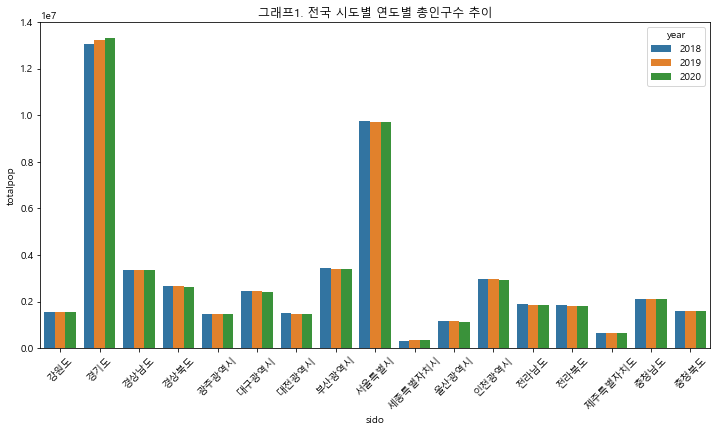

In [24]:
plt.figure(figsize=(12, 6))
g = sns.barplot(x='sido', y='totalpop', hue='year',data=pop_concat_grouped)
plt.xticks(rotation=45)
plt.title('그래프1. 전국 시도별 연도별 총인구수 추이')
plt.show()

#그래프 해석
#대부분 인구 변화가 거의 없다.
#경기도가 눈에 띄게 인구가 증가하고 있다.

#### 전국 2020년 6월 성별 그래프

In [25]:
pop20206 = pop[(pop['year']==2020)&(pop['month']==6)]

In [26]:
pop20206

,code,sido,gu,age,totalpop,malepop,femalepop,year,month
125879,11110,서울특별시,종로구,0-4세,3346,1683,1663,2020,6
125885,11110,서울특별시,종로구,5-9세,4550,2313,2237,2020,6
125891,11110,서울특별시,종로구,10-14세,5091,2581,2510,2020,6
125897,11110,서울특별시,종로구,15-19세,6218,3124,3094,2020,6
125903,11110,서울특별시,종로구,20-24세,10710,5026,5684,2020,6
...,...,...,...,...,...,...,...,...,...
157349,50130,제주특별자치도,서귀포시,80-84세,5098,1888,3210,2020,6
157355,50130,제주특별자치도,서귀포시,85-89세,2972,803,2169,2020,6
157361,50130,제주특별자치도,서귀포시,90-94세,876,141,735,2020,6
157367,50130,제주특별자치도,서귀포시,95-99세,330,38,292,2020,6


In [27]:
grouped20206 = pop20206.groupby(['sido','year']).sum().reset_index()

In [28]:
grouped20206 = grouped20206.drop(['code','month'], axis=1)

In [29]:
grouped20206

,sido,year,totalpop,malepop,femalepop
0,강원도,2020,1539282,774325,764957
1,경기도,2020,13338020,6711047,6626973
2,경상남도,2020,3349454,1686331,1663123
3,경상북도,2020,2646493,1332780,1313713
4,광주광역시,2020,1455048,720060,734988
5,대구광역시,2020,2427954,1198815,1229139
6,대전광역시,2020,1471040,734441,736599
7,부산광역시,2020,3404423,1668618,1735805
8,서울특별시,2020,9720846,4732275,4988571
9,세종특별자치시,2020,345341,172234,173107


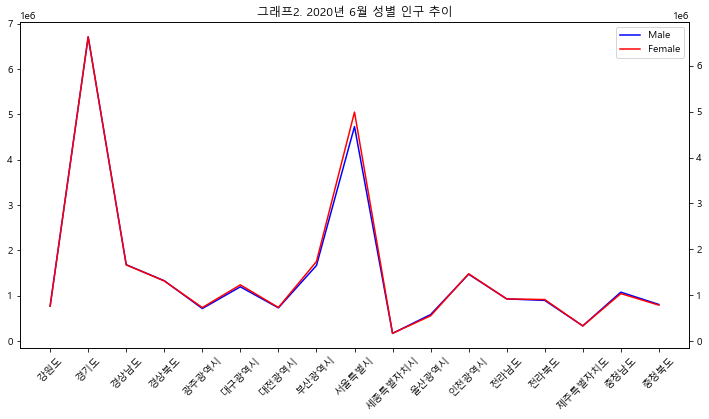

In [30]:
fig, ax1 = plt.subplots(figsize=(12, 6))
line1 = ax1.plot(grouped20206['sido'], grouped20206['malepop'], color='blue', label='Male')
plt.xticks(rotation=45)

ax2 = ax1.twinx()
line2 = ax2.plot(grouped20206['sido'], grouped20206['femalepop'], color='red', label='Female')
plt.xticks(rotation=45)

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right')

plt.title('그래프2. 2020년 6월 성별 인구 추이')
plt.show()

#그래프 해석
#이 그래프로는 차이를 보기 어렵다.
#더 자세히 보기 위해, 남성 인구와 여성 인구 차이를 보여주는 변수를 추가해야겠다.

In [31]:
#남성 인구 - 여성 인구를 계산한 diff 변수 추가
grouped20206['diff'] = grouped20206['malepop'] - grouped20206['femalepop']
grouped20206['diffratio'] = grouped20206['diff']/grouped20206['totalpop']*100

In [32]:
grouped20206

,sido,year,totalpop,malepop,femalepop,diff,diffratio
0,강원도,2020,1539282,774325,764957,9368,0.608595
1,경기도,2020,13338020,6711047,6626973,84074,0.630333
2,경상남도,2020,3349454,1686331,1663123,23208,0.692889
3,경상북도,2020,2646493,1332780,1313713,19067,0.720463
4,광주광역시,2020,1455048,720060,734988,-14928,-1.025946
5,대구광역시,2020,2427954,1198815,1229139,-30324,-1.248953
6,대전광역시,2020,1471040,734441,736599,-2158,-0.146699
7,부산광역시,2020,3404423,1668618,1735805,-67187,-1.973521
8,서울특별시,2020,9720846,4732275,4988571,-256296,-2.636561
9,세종특별자치시,2020,345341,172234,173107,-873,-0.252794


In [33]:
#그래프에서 마이너스 부호 보여주기 위한 글꼴 설정
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False

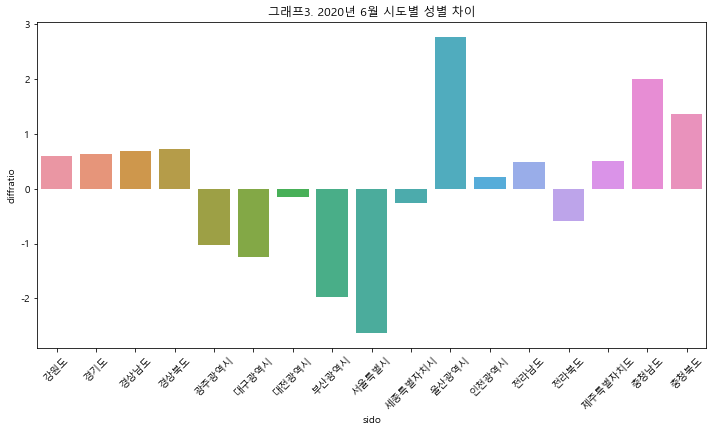

In [34]:
plt.figure(figsize=(12, 6))
g = sns.barplot(x='sido', y='diffratio',data=grouped20206)
plt.xticks(rotation=45)
plt.title('그래프3. 2020년 6월 시도별 성별 차이')
plt.show()

#그래프 해석
#인구대비 성별 차이 top3는 울산광역시, 서울특별시, 충청남도, 부산광역시이다.
#울산광역시와 충청남도는 남성 비율이 높으며, 서울특별시는 여성 비율이 높다.

### 서울특별시 데이터

#### 서울특별시 연령별 그래프

In [35]:
seoul = pd.DataFrame(pop[pop['sido']=='서울특별시'])

In [36]:
seoul

,code,sido,gu,age,totalpop,malepop,femalepop,year,month
0,11110,서울특별시,종로구,0-4세,4070,2054,2016,2018,1
1,11110,서울특별시,종로구,0-4세,4049,2049,2000,2018,2
2,11110,서울특별시,종로구,0-4세,4022,2036,1986,2018,3
3,11110,서울특별시,종로구,0-4세,4008,2025,1983,2018,4
4,11110,서울특별시,종로구,0-4세,4007,2017,1990,2018,5
...,...,...,...,...,...,...,...,...,...
129019,11740,서울특별시,강동구,100+,236,61,175,2020,2
129020,11740,서울특별시,강동구,100+,240,61,179,2020,3
129021,11740,서울특별시,강동구,100+,243,62,181,2020,4
129022,11740,서울특별시,강동구,100+,243,62,181,2020,5


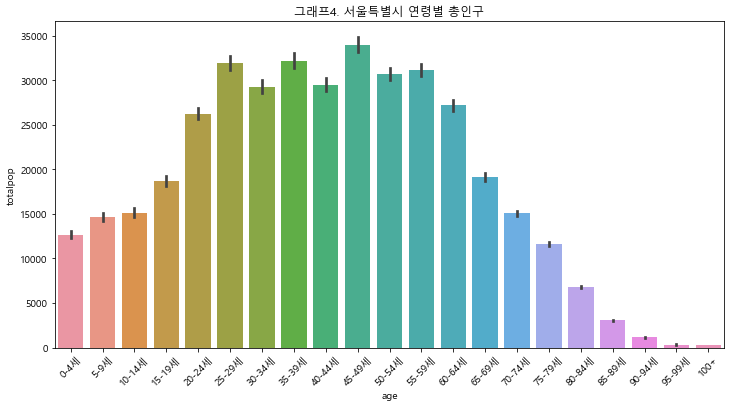

In [37]:
plt.figure(figsize=(12, 6))
g = sns.barplot(x='age', y='totalpop', data=seoul)
plt.xticks(rotation=45)
plt.title('그래프4. 서울특별시 연령별 총인구')
plt.show()

#### 2020년 6월 기준 서울특별시 총인구 지도 시각화

In [38]:
#2020년 6월 기준으로 총인구수 top 3 추출하기
seoul_20206 = seoul[(seoul['year']==2020)&(seoul['month']==6)]

In [39]:
seoul_20206 = seoul_20206.groupby('gu').sum().reset_index()
seoul_20206 = seoul_20206.drop(['year','month','code'],axis=1)

In [40]:
import requests
import json
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import os
import webbrowser
import folium
from folium import plugins

In [41]:
state_geo = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

In [42]:
m = folium.Map(location=[37.562225, 126.978555], tiles="OpenStreetMap", zoom_start=11)
color = '#3186cc'

m.choropleth(
    geo_data=state_geo,
    name='총인구 ',
    data=seoul_20206,
    columns=['gu','totalpop'],
    key_on='feature.properties.name',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.3,
    color = 'gray'
)

# I can add marker one by one on the map
# for i in range(0,len(df_INNER)):
#     latitude = df_INNER_2020['위도']
#     longitude = df_INNER_2020['경도']
#     location=(latitude, longitude)


folium.LayerControl(collapsed=False).add_to(m)

# Save to html
#m.save('jeonsae_2010.html')
#webbrowser.open_new("kr_incode(1).html")
m

C:\Users\1306h\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


#### 주요지역 살펴보기 - 총인구수 top3

In [43]:
seoul_20206[['gu','totalpop']].sort_values(by='totalpop', ascending=False).head(3)

,gu,totalpop
17,송파구,671512
3,강서구,586936
0,강남구,541233


##### 총인구 top 1. 송파구

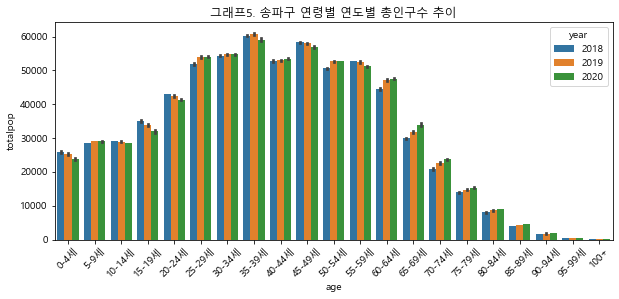

In [44]:
plt.figure(figsize=(10, 4))
g = sns.barplot(data=seoul[seoul['gu']=='송파구'],x='age', y='totalpop', hue='year')
plt.xticks(rotation=45)
plt.title('그래프5. 송파구 연령별 연도별 총인구수 추이')
plt.show()

#그래프 해석
#송파구는 중장년층이 많음
#60세 이상부터 연도 흐름에 따라 꾸준히 증가하는 추세

##### 총인구 top 2. 강서구

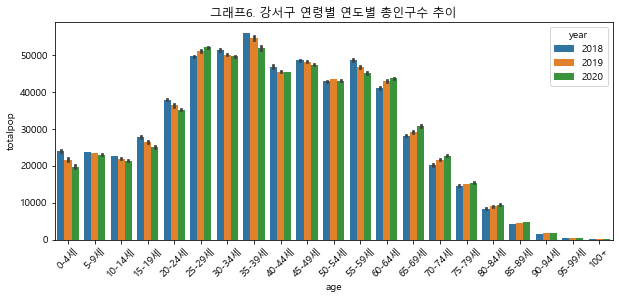

In [45]:
plt.figure(figsize=(10, 4))
g = sns.barplot(data=seoul[seoul['gu']=='강서구'],x='age', y='totalpop', hue='year')
plt.xticks(rotation=45)
plt.title('그래프6. 강서구 연령별 연도별 총인구수 추이')
plt.show()

#그래프 해석
#강서구는 비교적 청년층이 많음

##### 총인구 top 3.강남구

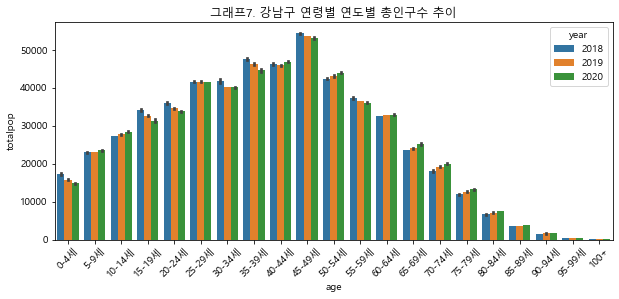

In [46]:
plt.figure(figsize=(10, 4))
g = sns.barplot(data=seoul[seoul['gu']=='강남구'],x='age', y='totalpop', hue='year')
plt.xticks(rotation=45)
plt.title('그래프7. 강남구 연령별 연도별 총인구수 추이')
plt.show()

#그래프 해석
#강남구는 중장년층이 많음
#송파구와 마찬가지로 60세 이상부터 연도 흐름에 따라 꾸준히 증가하는 추세

#### 주요지역 살펴보기 -  성별 차이

In [47]:
seoul_20206_copy = seoul_20206.copy()

In [48]:
#성별 차이를 나타내는 diff 변수 추가
seoul_20206_copy['diff'] = seoul_20206_copy['malepop'] - seoul_20206_copy['femalepop']

In [49]:
#인구수 대비 차이를 판단하기 위해
#ratio = diff/총인구 변수 추가
seoul_20206_copy['diffratio'] = seoul_20206_copy['diff']/seoul_20206_copy['totalpop'] *100

In [50]:
seoul_20206_copy

,gu,totalpop,malepop,femalepop,diff,diffratio
0,강남구,541233,258753,282480,-23727,-4.383879
1,강동구,457164,225206,231958,-6752,-1.476932
2,강북구,311773,152028,159745,-7717,-2.475198
3,강서구,586936,283697,303239,-19542,-3.329494
4,관악구,499740,250829,248911,1918,0.383800
5,광진구,349574,168879,180695,-11816,-3.380114
6,구로구,405075,200098,204977,-4879,-1.204468
7,금천구,232250,117762,114488,3274,1.409688
8,노원구,528887,255624,273263,-17639,-3.335117
9,도봉구,329560,160855,168705,-7850,-2.381964


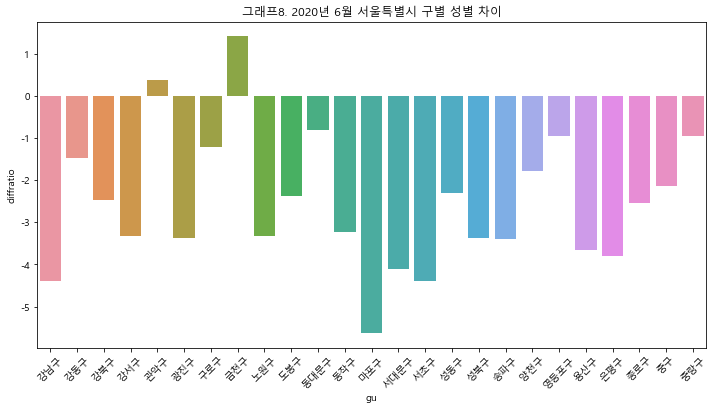

In [65]:
plt.figure(figsize=(12, 6))
g = sns.barplot(x='gu', y='diffratio',data=seoul_20206_copy)
plt.xticks(rotation=45)
plt.title('그래프8. 2020년 6월 서울특별시 구별 성별 차이')
plt.show()

#그래프 해석
#금천구, 관악구를 제외하고 모든 구에 여성이 더 많음

#### 주요지역 살펴보기 -  성별 차이 top3 bottom3

In [66]:
# diff ratio top 3
seoul_20206_copy[['gu','diffratio']].sort_values(by='diffratio', ascending=False).head(3)

,gu,diffratio
7,금천구,1.409688
4,관악구,0.383800
10,동대문구,-0.812806


In [67]:
#diff ratio bottom 3
seoul_20206_copy[['gu','diffratio']].sort_values(by='diffratio', ascending=False).tail(3)

,gu,diffratio
0,강남구,-4.383879
14,서초구,-4.393603
12,마포구,-5.625684


In [54]:
df_top = seoul_20206_copy.sort_values(by='diffratio', ascending=False).head(3)
df_tail = seoul_20206_copy.sort_values(by='diffratio', ascending=False).tail(3)

In [55]:
df_concat = pd.concat([df_top, df_tail])

In [56]:
df_concat

,gu,totalpop,malepop,femalepop,diff,diffratio
7,금천구,232250,117762,114488,3274,1.409688
4,관악구,499740,250829,248911,1918,0.383800
10,동대문구,345593,171392,174201,-2809,-0.812806
0,강남구,541233,258753,282480,-23727,-4.383879
14,서초구,428919,205037,223882,-18845,-4.393603
12,마포구,374390,176664,197726,-21062,-5.625684


In [57]:
list(df_concat.iloc[0:6,2:4].iloc[1])

[250829, 248911]

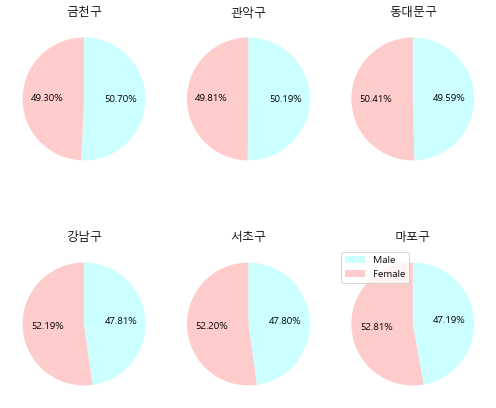

In [64]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3,figsize=(7,7)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정


pie1 = ax1.pie(list(df_concat.iloc[0:1,2:4].iloc[0]), ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p),
       colors=['#CCFFFF','#FFCCCC']) ## 퍼센티지 출력


pie2 = ax2.pie(list(df_concat.iloc[0:6,2:4].iloc[1]), 
       startangle=90, 
       counterclock=False, 
       autopct=lambda p : '{:.2f}%'.format(p),
       colors=['#CCFFFF','#FFCCCC']) 

pie3 = ax3.pie(list(df_concat.iloc[0:6,2:4].iloc[2]), 
       startangle=90, 
       counterclock=False, 
       autopct=lambda p : '{:.2f}%'.format(p),
       colors=['#CCFFFF','#FFCCCC']) 


pie4 = ax4.pie(list(df_concat.iloc[0:6,2:4].iloc[3]), 
       startangle=90, 
       counterclock=False, 
       autopct=lambda p : '{:.2f}%'.format(p),
       colors=['#CCFFFF','#FFCCCC'])

pie5 = ax5.pie(list(df_concat.iloc[0:6,2:4].iloc[4]),
       startangle=90, 
       counterclock=False, 
       autopct=lambda p : '{:.2f}%'.format(p),
       colors=['#CCFFFF','#FFCCCC']) 


pie6 = ax6.pie(list(df_concat.iloc[0:6,2:4].iloc[5]), 
       startangle=90, 
       counterclock=False,
       autopct=lambda p : '{:.2f}%'.format(p),
       colors=['#CCFFFF','#FFCCCC']) 
plt.legend(pie6[0],labels) 

ax1.set_title("금천구")
ax2.set_title("관악구")
ax3.set_title("동대문구")
ax4.set_title("강남구")
ax5.set_title("서초구")
ax6.set_title("마포구")

plt.tight_layout()
plt.show()

### 경기도 데이터

In [ ]:
gyeoungi = pop[pop['sido']=='경기도']

In [ ]:
gyeoungi

### 배달 데이터와 지역, 기간 일치시킨 데이터 만들기